# Read Me

Notebook contains:
* Dry and wet spells used in this study
* Spell count for dry and wet study
* Spell median for dry and wet study
* Example plots for each

# Imports

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticker


%matplotlib inline

**Note:** In the model set-up, I have first filtered out spells greater than a minimum spell duration. Then remaining spells are summed up to have greater than 40 spell count.

The condition for spells is to start in a given season, for example, `MJJASO`. I haven't truncated our spells after the end of MJJASO. That's why some regions have an uninterrupted long running spells in the raw spells file. Those regions are excluded from the Weibull model analysis as those regions don't have a spell count greater than required threshold.

In [6]:
dry_spells = xr.open_dataset('/scratch3/mali/data/spells/dry_spells/sensitivity_tests/\
NH_1.0mm_dry_spells_all_months_gap_1_days_no_spell2_check.nc', chunks={'lat':10, })

In [8]:
print(dry_spells)

<xarray.Dataset>
Dimensions:                    (lat: 91, lon: 360, time: 13515)
Coordinates:
  * lon                        (lon) float32 -180.0 -179.0 ... 178.0 179.0
  * lat                        (lat) float32 0.0 1.0 2.0 3.0 ... 88.0 89.0 90.0
  * time                       (time) datetime64[ns] 1980-01-01 ... 2016-12-31
Data variables:
    spell_mask                 (time, lat, lon) bool dask.array<chunksize=(13515, 10, 360), meta=np.ndarray>
    wet_mask                   (time, lat, lon) bool dask.array<chunksize=(13515, 10, 360), meta=np.ndarray>
    spell_start_date           (time, lat, lon) bool dask.array<chunksize=(13515, 10, 360), meta=np.ndarray>
    spell_length_cumsum_reset  (time, lat, lon) int16 dask.array<chunksize=(13515, 10, 360), meta=np.ndarray>
    spell_length_end_d         (time, lat, lon) int16 dask.array<chunksize=(13515, 10, 360), meta=np.ndarray>
    spell_length_startd        (time, lat, lon) int16 dask.array<chunksize=(13515, 10, 360), meta=np.ndarray>

In [9]:
# each variable name has an attribute explaining its purpose
## for eg
dry_spells.spell_mask

<xarray.DataArray 'spell_mask' (time: 13515, lat: 91, lon: 360)>
dask.array<open_dataset-ae478c78fbd61957bc4a61c05d7266e1spell_mask, shape=(13515, 91, 360), dtype=bool, chunksize=(13515, 10, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * lat      (lat) float32 0.0 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2016-12-31
Attributes:
    Comment:  Boolean array for spell duration for whole year

# Example plot

## Dry Spell count for MJJASO

/home/mali/anaconda3/envs/work_env/lib/python3.8/site-packages/xarray/plot/utils.py:624: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(primitive, **cbar_kwargs)


Text(0.5, 1.0, 'MJJASO dry spell count for spells having min. spell length=5')

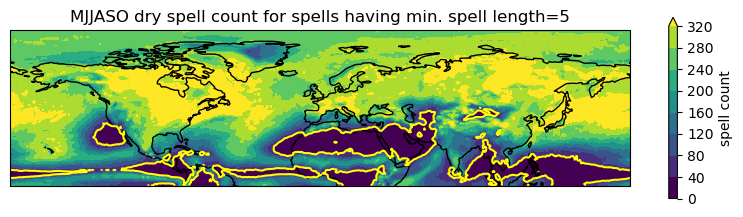

In [18]:
# taking out only spells with minimum length 5
spells_m5_MJJASO = dry_spells.start_d_MJJASO.where(dry_spells.spell_length_startd.values > 4, other=0)

# spell count
spells_m5_MJJASO_count = spells_m5_MJJASO.sum('time')

# plotting
map_projection=ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), dpi=100, subplot_kw=dict(projection=map_projection))
spells_m5_MJJASO_count.plot.contourf(ax=ax, levels=np.arange(0,321,40),
                                     cbar_kwargs=dict(shrink=0.4, label='spell count'))
spells_m5_MJJASO_count.plot.contour(ax=ax, levels=[40], colors=['yellow'],
                                   )
ax.coastlines()
plt.title('MJJASO dry spell count for spells having min. spell length=5')

Yellow contour enclose regions with less than 40 spells. They are either regions with long, uninterrupted dry spells, or regions where it rains a lot, and thus, doesn't have minimum spell length of 5 days.

# Spell Count

In [ ]:
def plot_spell_count(da, region='NH', season='MJJASO', spell_type='dry'):
    map_projection=ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100, subplot_kw=dict(projection=map_projection))
    da.plot(ax=ax, levels=np.arange(0, 1000, 50), extend='max', 
            cmap='YlGnBu', cbar_kwargs=dict(label= 'number of spells', 
                                            orientation='horizontal',
                                            shrink=0.6)
           )


0
1
2
3


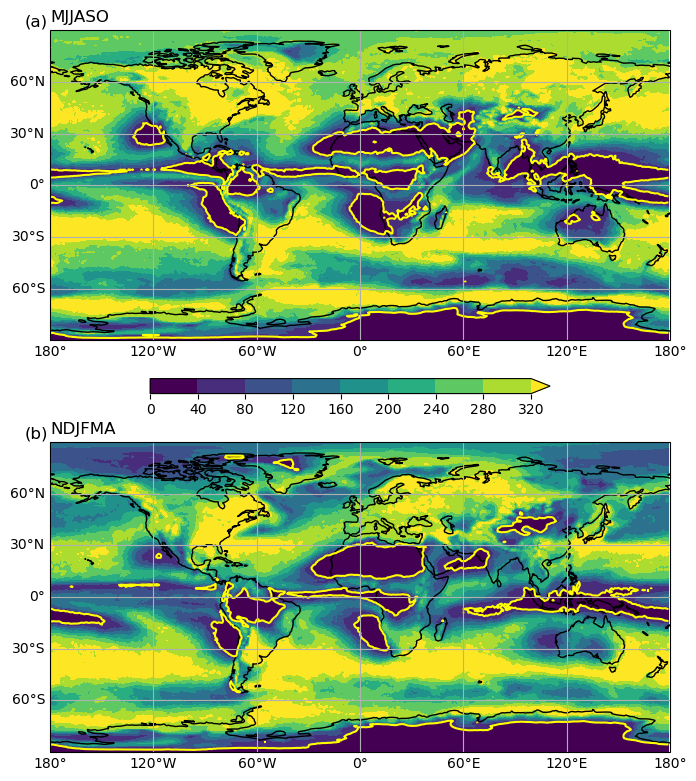

In [30]:
data_projection = ccrs.PlateCarree()

map_projection=data_projection

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=[8,10], subplot_kw=dict(projection=map_projection),
                               dpi=100)

axes=[ax1, ax1, ax2, ax2]

files_spells=['/scratch3/mali/data/spells/dry_spells/sensitivity_tests/\
NH_1.0mm_dry_spells_all_months_gap_1_days_no_spell2_check.nc', 
            '/scratch3/mali/data/spells/dry_spells/sensitivity_tests/\
SH_1.0mm_dry_spells_all_months_gap_1_days_no_spell2_check.nc']
            

var = ['start_d_MJJASO', 'start_d_MJJASO', 'start_d_NDJFMA', 'start_d_NDJFMA' ]

file_order = [files_spells[0], files_spells[1], files_spells[0], files_spells[1]]

mpl.rcParams['hatch.color'] = 'grey'

for i in range(0,4):
    with xr.open_dataset(file_order[i], chunks={'lon':10}) as ds:
        # taking out only spells with minimum length 5 in a season
        spells_m5 = ds[var[i]].where(ds.spell_length_startd.values > 4, other=0)

        # spell count
        spells_m5_count = spells_m5.sum('time')
                 
        ax=axes[i]
        print(i)
    
        a = spells_m5_count.plot.contourf(ax=ax, levels=np.arange(0,321,40),
                                      cmap='viridis',
                                      add_colorbar=False,
                                      )
        spells_m5_count.plot.contour(ax=ax, levels=[40], colors=['yellow'],
                                     )
        
                
ax1.set_extent([-180, 180, -90, 90])
ax2.set_extent([-180, 180, -90, 90])
ax1.set_title('MJJASO', loc='left')
ax2.set_title('NDJFMA', loc='left')
ax1.text(-195, 92, '(a)', fontsize=12)
ax2.text(-195, 92, '(b)', fontsize=12)

for ax in [ax1, ax2]:

    ax.coastlines();
    # ax.set_extent(crs=data_projection)
    gl = ax.gridlines(draw_labels=True, x_inline=False);
    gl.top_labels = False
    gl.right_labels = False

cbar_ax = fig.add_axes([0.25, 0.5, 0.5, 0.015]) #rect : sequence of float
        #The dimensions [left, bottom, width, height] of the new axes. 
        #All quantities are in fractions of figure width and height.


        ##  Adding colorbar for T2M
cb1 = fig.colorbar(a, cax=cbar_ax, 
                   orientation='horizontal', pad=0.1)
for fig_format in ['.jpg', '.png', '.pdf']:
    plt.savefig('/scratch3/mali/PhD/Project_extremes/Paper_on_extremes/plots_paper/HQ2/Dry_spell_count_joint'+fig_format, 
                dpi=800, bbox_inches='tight')



## Wet Spells


0
1
2
3


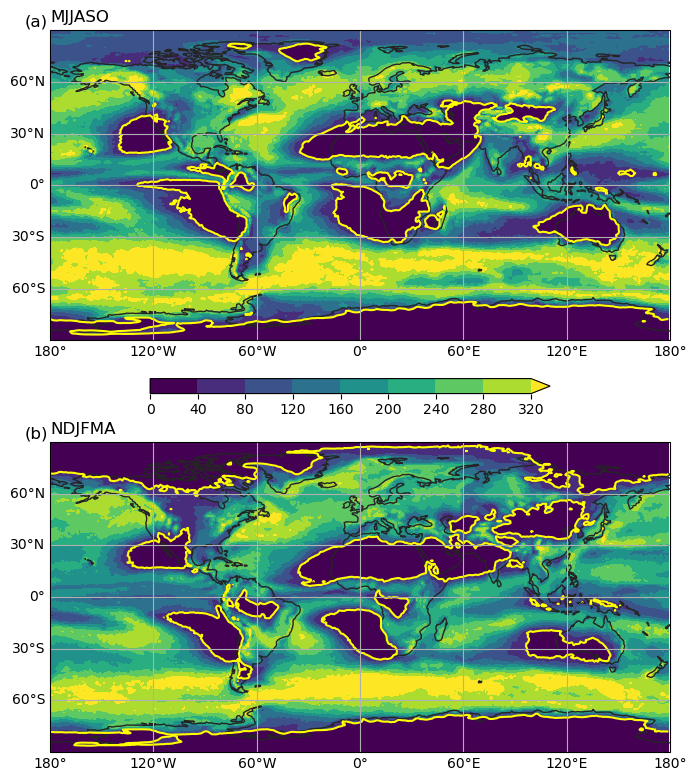

In [34]:
data_projection = ccrs.PlateCarree()

map_projection=data_projection

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=[8,10], subplot_kw=dict(projection=map_projection),
                               dpi=100)

axes=[ax1, ax1, ax2, ax2]

files_spells=['/scratch3/mali/data/spells/wet_spells/sensitivity_tests/\
NH_1.0mm_wet_spells_all_months_gap_1_days_no_spell2_check.nc',
            '/scratch3/mali/data/spells/wet_spells/sensitivity_tests/\
SH_1.0mm_wet_spells_all_months_gap_1_days_no_spell2_check.nc']
            

var = ['start_d_MJJASO', 'start_d_MJJASO', 'start_d_NDJFMA', 'start_d_NDJFMA' ]

file_order = [files_spells[0], files_spells[1], files_spells[0], files_spells[1]]

mpl.rcParams['hatch.color'] = 'grey'

for i in range(0,4):
    with xr.open_dataset(file_order[i], chunks={'lon':10}) as ds:
        # taking out only spells with minimum length 5 in a season
        spells_m5 = ds[var[i]].where(ds.spell_length_startd.values > 4, other=0)

        # spell count
        spells_m5_count = spells_m5.sum('time')
                 
        ax=axes[i]
        print(i)
 
        a = spells_m5_count.plot.contourf(ax=ax, levels=np.arange(0,321,40),
                                      cmap='viridis',
                                      add_colorbar=False,
                                      )
        spells_m5_count.plot.contour(ax=ax, levels=[40], colors=['yellow'],
                                     )
        # break
        
                
ax1.set_extent([-180, 180, -90, 90])
ax2.set_extent([-180, 180, -90, 90])
ax1.set_title('MJJASO', loc='left')
ax2.set_title('NDJFMA', loc='left')
ax1.text(-195, 92, '(a)', fontsize=12)
ax2.text(-195, 92, '(b)', fontsize=12)

for ax in [ax1, ax2]:

    ax.coastlines(color='#252525');
    # ax.set_extent(crs=data_projection)
    gl = ax.gridlines(draw_labels=True, x_inline=False);
    gl.top_labels = False
    gl.right_labels = False

cbar_ax = fig.add_axes([0.25, 0.5, 0.5, 0.015]) #rect : sequence of float
        #The dimensions [left, bottom, width, height] of the new axes. 
        #All quantities are in fractions of figure width and height.


        ##  Adding colorbar for T2M
cb1 = fig.colorbar(a, cax=cbar_ax, 
                   orientation='horizontal', pad=0.1)
#for fig_format in ['.jpg', '.png', '.pdf']:
#    plt.savefig('/scratch3/mali/PhD/Project_extremes/Paper_on_extremes/plots_paper/HQ2/Wet_spell_count_joint'+fig_format, 
#                dpi=800, bbox_inches='tight')



# Median spell length

## Example plot

In [35]:
# Taking only spells greater than minimum duration of 4 days
spells_length_mjjaso_m5 = dry_spells.spell_length_startd.where(cond=((dry_spells.start_d_MJJASO > 0) &
                                                                     (dry_spells.spell_length_startd.values > 4)))

spells_length_mjjaso_m5_median = spells_length_mjjaso_m5.median('time', skipna=True).compute()

/home/mali/anaconda3/envs/work_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [3]:
median_colors = [(253/255,216/255,118/255),(255/255,237/255,160/255),(237/255,250/255,194/255), (205/255,255/255,205/255),
                (153/255,240/255,178/255), (85/255,181/255,154/255),(50/255,166/255,150/255),
                (50/255,150/255,180/255), (5/255,112/255,176/255),(5/255,80/255,140/255),
                (10/255,31/255,150/255), (44/255,2/255,70/255)]

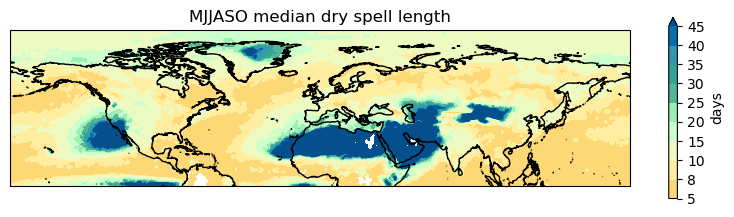

In [43]:
map_projection=ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), dpi=100, subplot_kw=dict(projection=map_projection))
spells_length_mjjaso_m5_median.plot.contourf(ax=ax, levels=[5,8,10,15,20,25,30,35,40,45],
                                            colors=median_colors,
                                            cbar_kwargs = dict(shrink=0.4,
                                                              label='days'))

ax.coastlines('50m')
plt.title('MJJASO median dry spell length');

## Dry Spells

0


/home/mali/anaconda3/envs/work_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


1


/home/mali/anaconda3/envs/work_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


2


/home/mali/anaconda3/envs/work_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


3


/home/mali/anaconda3/envs/work_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


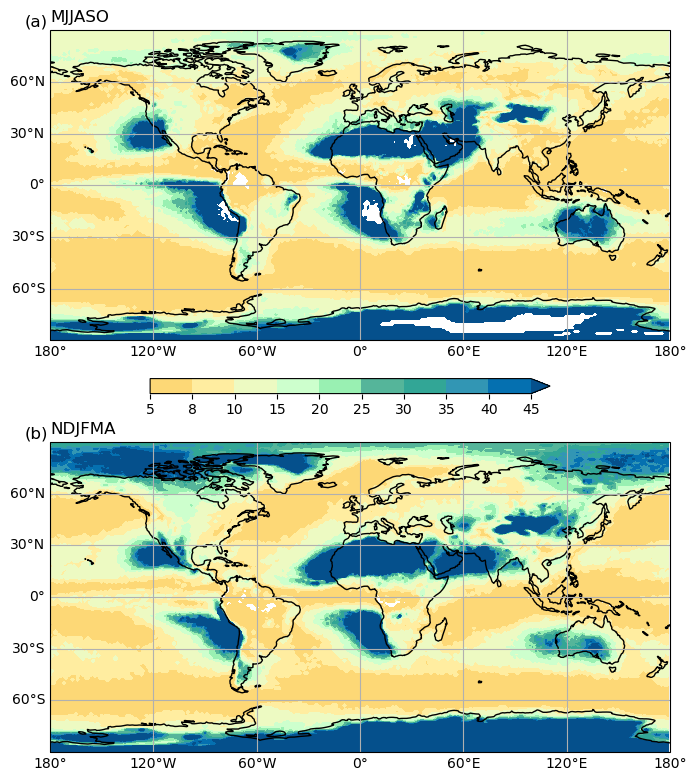

In [4]:
data_projection = ccrs.PlateCarree()

map_projection=data_projection

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=[8,10], subplot_kw=dict(projection=map_projection),
                               dpi=100)

axes=[ax1, ax1, ax2, ax2]

files_spells=['/scratch3/mali/data/spells/dry_spells/sensitivity_tests/\
NH_1.0mm_dry_spells_all_months_gap_1_days_no_spell2_check.nc', 
            '/scratch3/mali/data/spells/dry_spells/sensitivity_tests/\
SH_1.0mm_dry_spells_all_months_gap_1_days_no_spell2_check.nc']
            

var = ['start_d_MJJASO', 'start_d_MJJASO', 'start_d_NDJFMA', 'start_d_NDJFMA' ]

file_order = [files_spells[0], files_spells[1], files_spells[0], files_spells[1]]

mpl.rcParams['hatch.color'] = 'grey'

for i in range(0,4):
    with xr.open_dataset(file_order[i], chunks={'lon':10}) as ds:
        # taking out only spells with minimum length 5 in a season
        spells_season_m5 = ds.spell_length_startd.where(cond=((ds.spell_length_startd.values > 4) &
                                                        (ds[var[i]] > 0)), 
                                                        )
        
        spells_season_m5_median = spells_season_m5.median('time', skipna=True)
              
        ax=axes[i]
        print(i)

        a = spells_season_m5_median.plot.contourf(ax=ax, 
                                                  levels=[5,8,10,15,20,25,30,35,40,45],
                                                  colors=median_colors,
                                                  add_colorbar=False,
                                                  )
        
                
ax1.set_extent([-180, 180, -90, 90])
ax2.set_extent([-180, 180, -90, 90])
ax1.set_title('MJJASO', loc='left')
ax2.set_title('NDJFMA', loc='left')
ax1.text(-195, 92, '(a)', fontsize=12)
ax2.text(-195, 92, '(b)', fontsize=12)

for ax in [ax1, ax2]:

    ax.coastlines();
    # ax.set_extent(crs=data_projection)
    gl = ax.gridlines(draw_labels=True, x_inline=False);
    gl.top_labels = False
    gl.right_labels = False

cbar_ax = fig.add_axes([0.25, 0.5, 0.5, 0.015]) #rect : sequence of float
        #The dimensions [left, bottom, width, height] of the new axes. 
        #All quantities are in fractions of figure width and height.


        ##  Adding colorbar for T2M
cb1 = fig.colorbar(a, cax=cbar_ax, 
                   orientation='horizontal', pad=0.1)
for fig_format in ['.jpg', '.png', '.pdf']:
    plt.savefig('/scratch3/mali/PhD/Project_extremes/Paper_on_extremes/plots_paper/HQ2/Dry_median_joint'+fig_format, 
                dpi=800, bbox_inches='tight')



## Wet spells

0


/home/mali/anaconda3/envs/work_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


1


/home/mali/anaconda3/envs/work_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


2


/home/mali/anaconda3/envs/work_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


3


/home/mali/anaconda3/envs/work_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


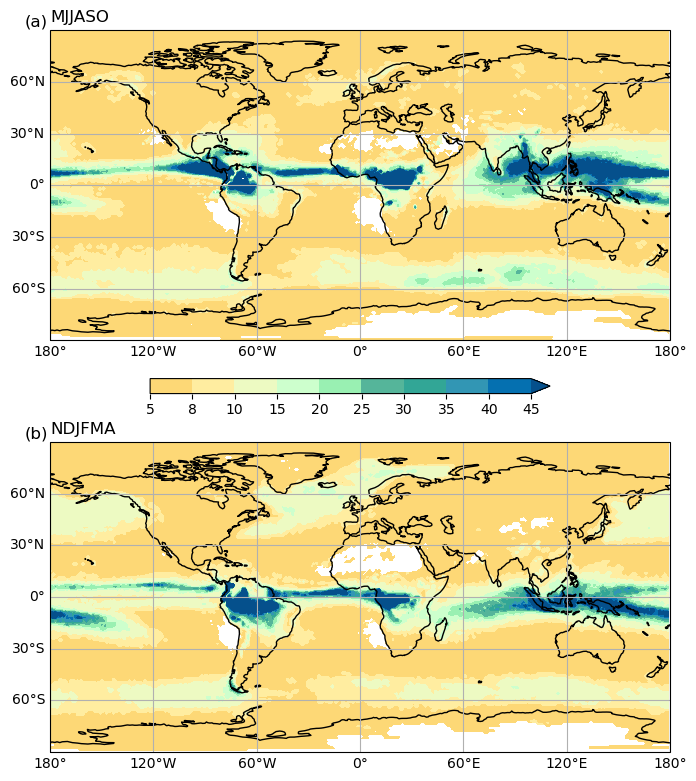

In [6]:
data_projection = ccrs.PlateCarree()

map_projection=data_projection

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=[8,10], subplot_kw=dict(projection=map_projection),
                               dpi=100)

axes=[ax1, ax1, ax2, ax2]

files_spells=['/scratch3/mali/data/spells/wet_spells/sensitivity_tests/\
NH_1.0mm_wet_spells_all_months_gap_1_days_no_spell2_check.nc',
            '/scratch3/mali/data/spells/wet_spells/sensitivity_tests/\
SH_1.0mm_wet_spells_all_months_gap_1_days_no_spell2_check.nc']
            

var = ['start_d_MJJASO', 'start_d_MJJASO', 'start_d_NDJFMA', 'start_d_NDJFMA' ]

file_order = [files_spells[0], files_spells[1], files_spells[0], files_spells[1]]

mpl.rcParams['hatch.color'] = 'grey'

for i in range(0,4):
    with xr.open_dataset(file_order[i], chunks={'lon':10}) as ds:
        # taking out only spells with minimum length 5 in a season
        spells_season_m5 = ds.spell_length_startd.where(cond=((ds.spell_length_startd.values > 4) &
                                                        (ds[var[i]] > 0)), 
                                                        )
        
        spells_season_m5_median = spells_season_m5.median('time', skipna=True)
              
        ax=axes[i]
        print(i)

        a = spells_season_m5_median.plot.contourf(ax=ax, 
                                                  levels=[5,8,10,15,20,25,30,35,40,45],
                                                  colors=median_colors,
                                                  add_colorbar=False,
                                                  )
        
                
ax1.set_extent([-180, 180, -90, 90])
ax2.set_extent([-180, 180, -90, 90])
ax1.set_title('MJJASO', loc='left')
ax2.set_title('NDJFMA', loc='left')
ax1.text(-195, 92, '(a)', fontsize=12)
ax2.text(-195, 92, '(b)', fontsize=12)

for ax in [ax1, ax2]:

    ax.coastlines();
    # ax.set_extent(crs=data_projection)
    gl = ax.gridlines(draw_labels=True, x_inline=False);
    gl.top_labels = False
    gl.right_labels = False

cbar_ax = fig.add_axes([0.25, 0.5, 0.5, 0.015]) #rect : sequence of float
        #The dimensions [left, bottom, width, height] of the new axes. 
        #All quantities are in fractions of figure width and height.


        ##  Adding colorbar for T2M
cb1 = fig.colorbar(a, cax=cbar_ax, 
                   orientation='horizontal', pad=0.1)
for fig_format in ['.jpg', '.png', '.pdf']:
    plt.savefig('/scratch3/mali/PhD/Project_extremes/Paper_on_extremes/plots_paper/HQ2/Wet_median_joint'+fig_format, 
                dpi=800, bbox_inches='tight')

